# Multiple Linear Regression


In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('carprice.csv')

In [3]:
# Removing few features to make the solution less complicated
# The below features can be converted into OneHotEncoder and the results can be enhanced
dataset.pop('fueltype')
dataset.pop('aspiration')
dataset.pop('drivewheel')
dataset.pop('enginelocation')
dataset.pop('enginetype')
dataset.pop('fuelsystem')
dataset.pop('CarName')

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [4]:
#Let's simply convert these categorical to numerical's using LabelEncoder/replace functionality
dataset['doornumber'].replace(['four','two'],[4,2],inplace=True)
dataset['carbody'].replace(['sedan','hatchback', 'wagon', 'hardtop', 'convertible'],[1,2,3,4,5],inplace=True)
dataset['cylindernumber'].replace(['four','six','five', 'eight', 'two', 'three', 'twelve'],[4,6,5,8,2,3,12],inplace=True)

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [8]:
# Evaluating the Model Perormance
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7781621059497594

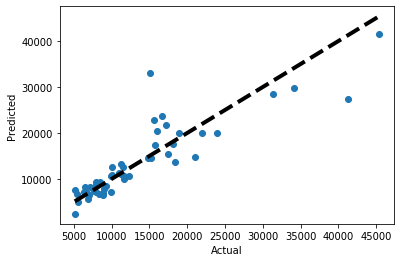

In [9]:
#Let's plot Actual vs Predicted
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [10]:
#Building optimal model using Backward Elimination
import statsmodels.api as sm

X = np.append(arr = np.ones((205, 1)).astype(int), values = X, axis = 1)
#Step 2 of backward elimination
X_opt = X[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17, 18]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

X_opt = X[:, [0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17, 18]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

X_opt = X[:, [0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17, 18]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

X_opt = X[:, [0,1,2,8,9,11,12,13,14,15,16,17, 18]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

X_opt = X[:, [0,1,2,8,9,11,12,14,15,16,17]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

X_opt = X[:, [0,1,2,8,11,12,14,15,16,17]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     117.6
Date:                Sat, 06 Jun 2020   Prob (F-statistic):           7.56e-74
Time:                        15:14:27   Log-Likelihood:                -1941.7
No. Observations:                 205   AIC:                             3903.
Df Residuals:                     195   BIC:                             3937.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.969e+04   9827.765     -4.039      0.000   -5.91e+04   -2.03e+04
x1           -17.5312      4.256     -4.119      0.000     -25.925      -9.138
x2            90.7098    220.389      0.412      0.681    -343.942     525.361
x3           409.5646    121.405      3.374      0.001     170.129     649.000
x4           109.4667     12.163      9.000      0.000      85.479     133.455
x5          1248.2452   1218.819      1.024      0.307   -1155.514    3652.005
x6           355.6603     69.397      5.125      0.000     218.795     492.525
x7            53.3835     14.965      3.567      0.000      23.870      82.897
x8             1.7492      0.671      2.607      0.010       0.426       3.072
x9          -138.1570     66.306     -2.084      0.038    -268.926      -7.388
==============================================================================
Omnibus:                        9.542   Durbin-Watson:                   0.985
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               18.486
Skew:                           0.124   Prob(JB):                     9.68e-05
Kurtosis:                       4.450   Cond. No.                     2.25e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""